Index(['ID', 'Prompt', 'UserId', 'Chapter_2 → StoryId',
       'Chapter_2 → ChapterNumber', 'Chapter_2 → Summary', 'Is Subscriber',
       'Account Age', 'User - UserId → RemainingUsage'],
      dtype='object')
Is Subscriber
0    1.561
1    1.388


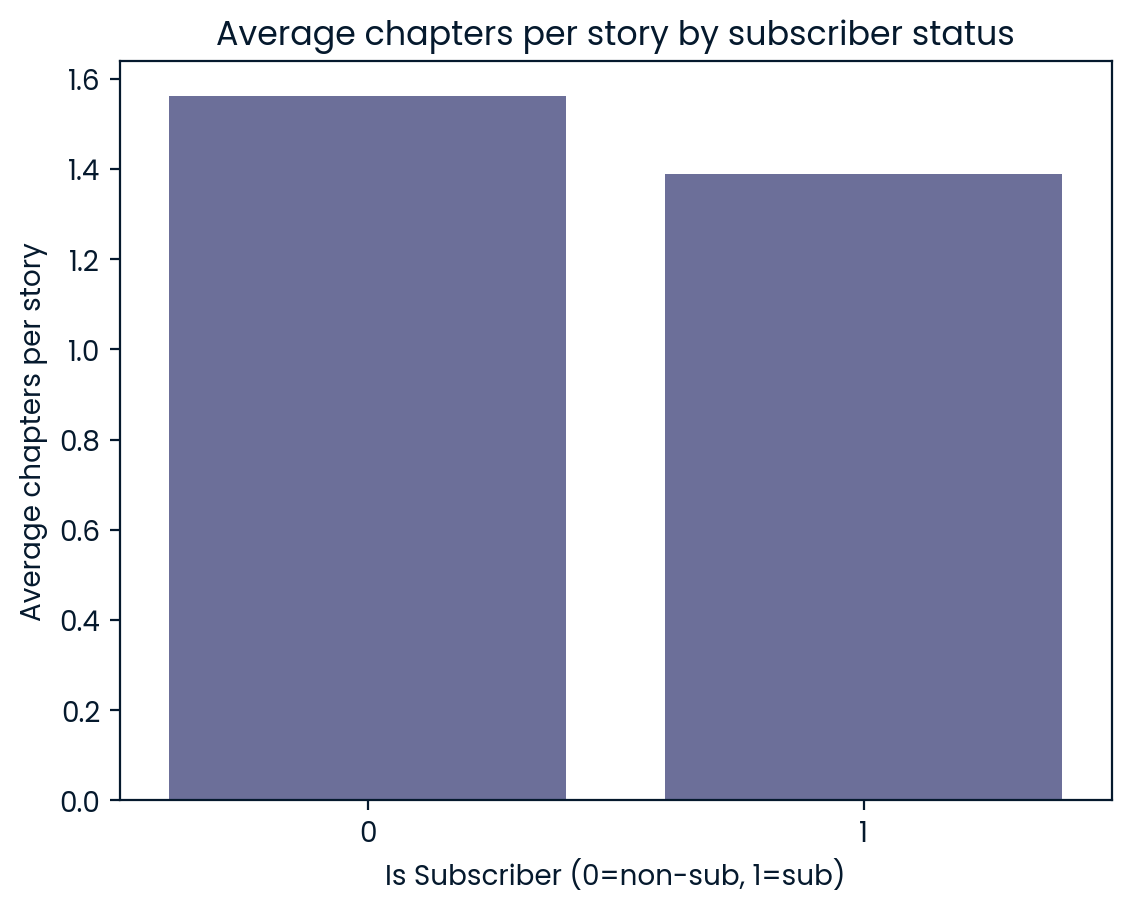

Row-level stats by Is Subscriber:
               mean_account_age  median_account_age  mean_remaining_usage  median_remaining_usage  n_rows
Is Subscriber                                                                                            
0                         1.959                 0.0                40.269                     5.0     387
1                         3.097                 0.0               535.655                   440.0     113


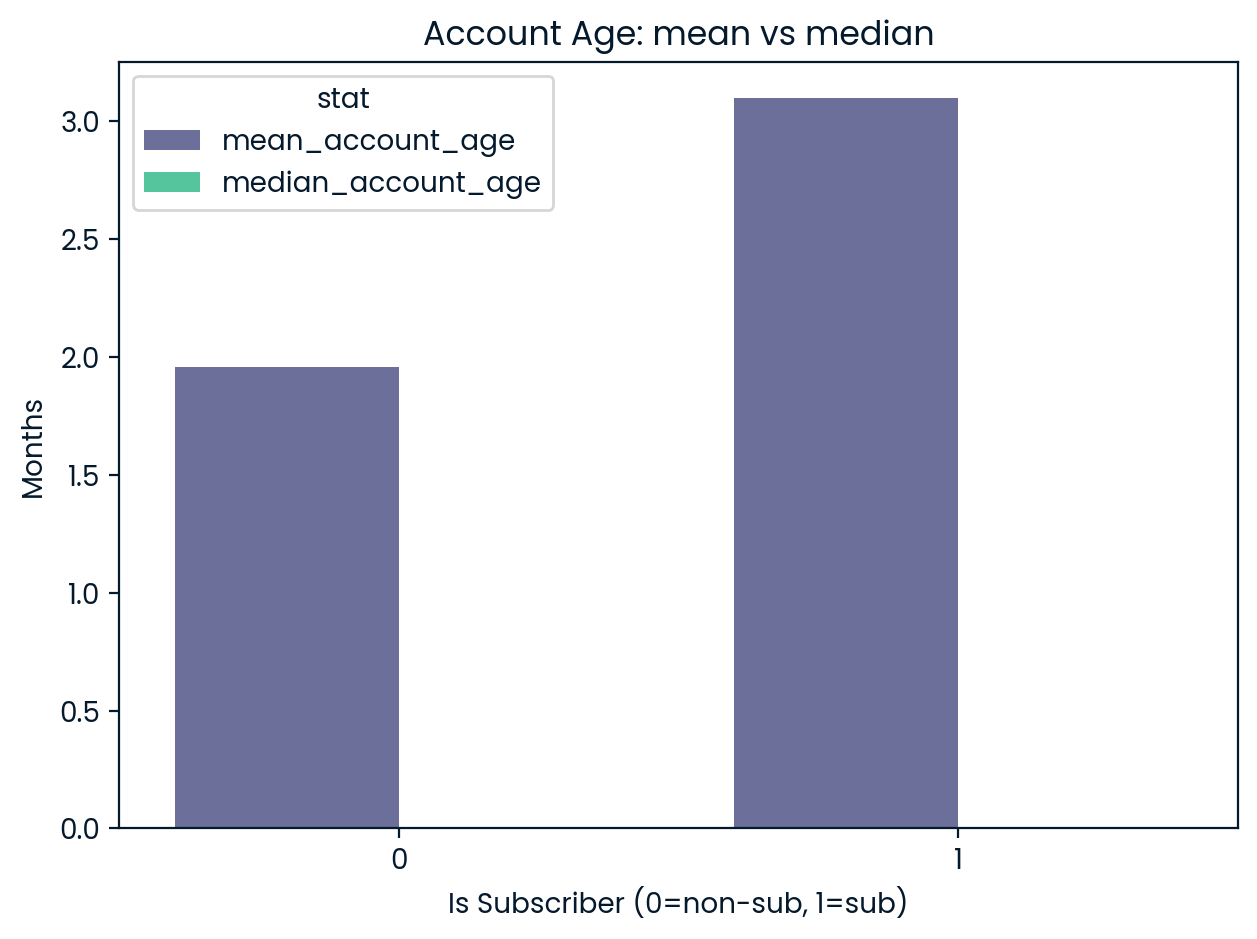

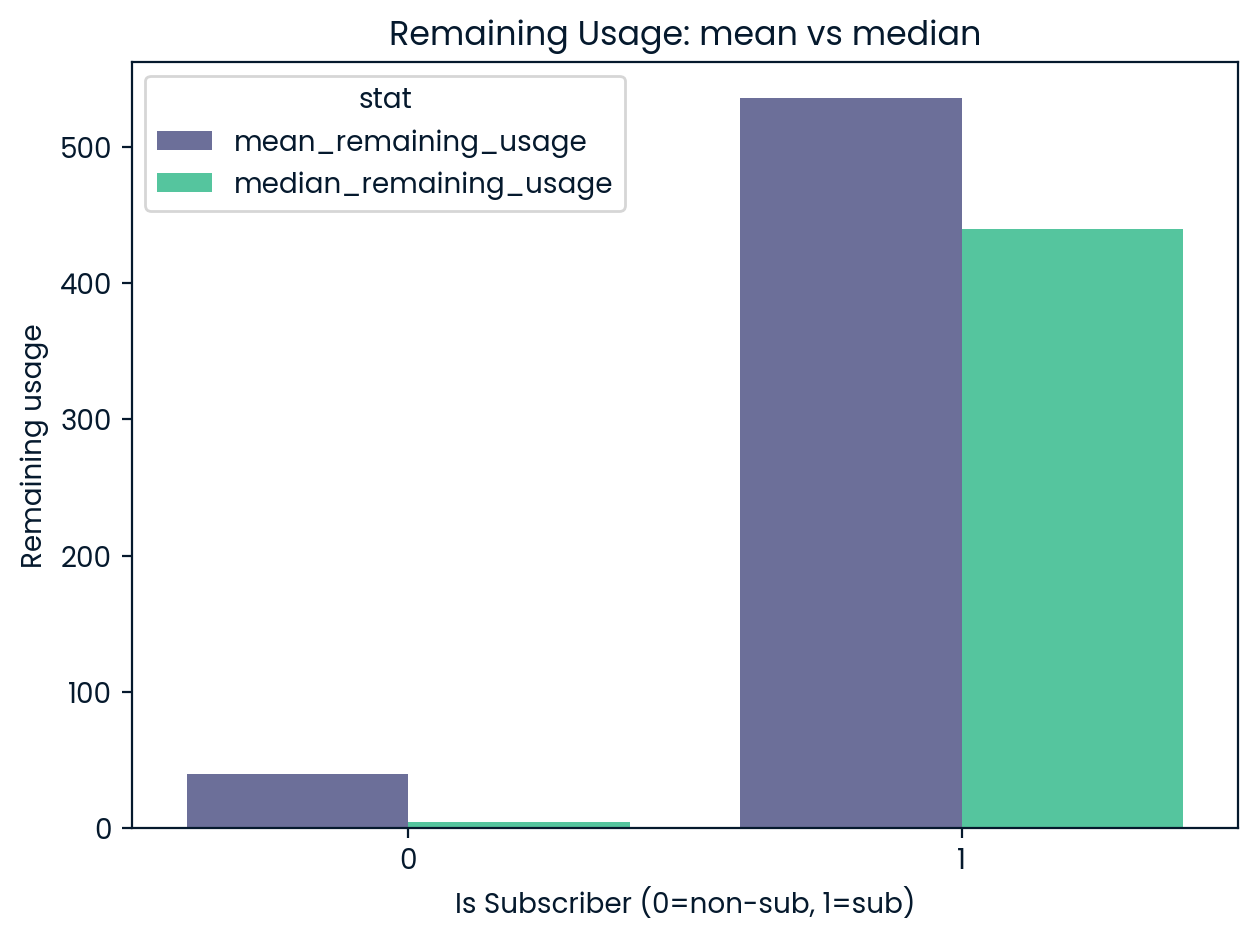

Is Subscriber
0    0.0
1    0.0
Name: Account Age, dtype: float64


In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("transformed_table.xlsx")
print(df.columns)

#grouping/subsetting/cleaning
work = df.copy()
work["Chapter_2 → ChapterNumber"] = pd.to_numeric(work["Chapter_2 → ChapterNumber"], errors="coerce")
work = work.dropna(subset=["Chapter_2 → StoryId", "Chapter_2 → ChapterNumber"])

per_story = (
    work.groupby(["Is Subscriber","Chapter_2 → StoryId"])["Chapter_2 → ChapterNumber"]
        .max()
)
avg_chapters = per_story.groupby("Is Subscriber").mean().round(3)

print(avg_chapters.to_string())
avg_df = avg_chapters.reset_index(name="avg_chapters").copy()
avg_df["Is Subscriber"] = avg_df["Is Subscriber"].astype(int)

sns.barplot(data=avg_df, x="Is Subscriber", y="avg_chapters")
plt.xlabel("Is Subscriber (0=non-sub, 1=sub)")
plt.ylabel("Average chapters per story")
plt.title("Average chapters per story by subscriber status")
plt.savefig("avg sub v nonsub.png")
plt.show()

#######

# Ensure numeric types
df["Account Age"] = pd.to_numeric(df["Account Age"], errors="coerce")
df["User - UserId → RemainingUsage"] = pd.to_numeric(df["User - UserId → RemainingUsage"], errors="coerce")

# Row-level averages and medians by subscriber group
stats = (
    df.groupby("Is Subscriber")
      .agg(
          mean_account_age=("Account Age", "mean"),
          median_account_age=("Account Age", "median"),
          mean_remaining_usage=("User - UserId → RemainingUsage", "mean"),
          median_remaining_usage=("User - UserId → RemainingUsage", "median"),
          n_rows=("ID", "count")
      )
      .round(3)
)

print("Row-level stats by Is Subscriber:")
print(stats.to_string())

# Ensure numeric
df["Account Age"] = pd.to_numeric(df["Account Age"], errors="coerce")
df["User - UserId → RemainingUsage"] = pd.to_numeric(df["User - UserId → RemainingUsage"], errors="coerce")

# Aggregate
agg = (
    df.groupby("Is Subscriber", as_index=False)
      .agg(
          mean_account_age=("Account Age", "mean"),
          median_account_age=("Account Age", "median"),
          mean_remaining_usage=("User - UserId → RemainingUsage", "mean"),
          median_remaining_usage=("User - UserId → RemainingUsage", "median"),
      )
      .round(3)
)

# --- Figure 1: Account Age (mean vs median) ---
age_long = agg.melt(
    id_vars="Is Subscriber",
    value_vars=["mean_account_age", "median_account_age"],
    var_name="stat",
    value_name="value"
)
plt.figure()
sns.barplot(data=age_long, x="Is Subscriber", y="value", hue="stat")
plt.xlabel("Is Subscriber (0=non-sub, 1=sub)")
plt.ylabel("Months")
plt.title("Account Age: mean vs median")
plt.tight_layout()
plt.savefig("account_age_stats.png")
plt.show()

# --- Figure 2: Remaining Usage (mean vs median) ---
ru_long = agg.melt(
    id_vars="Is Subscriber",
    value_vars=["mean_remaining_usage", "median_remaining_usage"],
    var_name="stat",
    value_name="value"
)
plt.figure()
sns.barplot(data=ru_long, x="Is Subscriber", y="value", hue="stat")
plt.xlabel("Is Subscriber (0=non-sub, 1=sub)")
plt.ylabel("Remaining usage")
plt.title("Remaining Usage: mean vs median")
plt.tight_layout()
plt.savefig("remaining_usage_stats.png")
plt.show()

